<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>


<br> <a href="./SRAL_data_access.ipynb">2 - SRAL data access >></a><span style="float:right;"><a href="./4_SRAL_SLAs.ipynb">4 - SRAL Sea-level anomalies >></a> 

## First look at "basic" altimetry data for Sentinel-3, SRAL ##

The main point of this exercise is to show you how altimetry data 'looks', and especially to highlight that altimetry data are not (for now) imagery or swath data. Thus you won't have a native grid of pixels, but a 'track' of data.

As usual, we begin by importing required libraries

In [2]:
# to interpret paths and folder for any OS
import os
# math library
import numpy as np
# reading of NetCDF data
import xarray as xr
# plotting library
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import dates
# mapping library
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In the box below, we will set up a few parameters to help our figure plotting later on

In [3]:
#we will look at the plot within the notebooks
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,10)
plt.ioff()
matplotlib.rcParams.update({'font.size': 16})

land_resolution = '50m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

To help to find your data, please complete the MYPATH variable below with the output generated by the /Configuration_Testing/Data_Path_Checker.ipynb Jupyter notebook in the Configuration_Testing folder. 

In [8]:
MYPATH = os.getcwd()

Sentinel-3 SRAL level 2 data are provided in three versions (all in the same zipped folder): reduced, standard and enhanced. The nomenclature of the folder name for these products is SATELLITE_SR_level_WAT____begindate_time_enddate_time_XXX_cycle_orbit; so in the case of a Sentinel-3A level-2 altimetry product, a product would beging with the following designation:

S3A_SR_2_WAT____

Try the below cell on standard, reduced and enhanced file in turn. Note the differences between them (e.g. in the number of variables). The use of either of these files depends on your need and/or expertise and storage capability.

In [16]:
#look at what is in a Sentinel-3A SRAL file folder


input_root = os.path.join(MYPATH,'sral_data')
input_path = 'S3B_SR_2_WAT____20210601T105631_20210601T114338_20210627T032723_2827_053_094______MAR_O_NT_004.SEN3'
input_file = 'standard_measurement.nc'
#input_file = 'reduced_measurement.nc'
#input_file = 'enhanced_measurement.nc'

my_file = os.path.join(input_root,input_path,input_file)
nc = xr.open_dataset(my_file)

#list the variables within the file.
for variable in nc.variables:
    print(variable)

time_01
time_20_ku
time_20_c
UTC_day_01
UTC_sec_01
UTC_day_20_ku
UTC_sec_20_ku
UTC_day_20_c
UTC_sec_20_c
UTC_time_1hz_20_ku
UTC_time_1hz_20_c
lat_01
lon_01
lat_20_ku
lon_20_ku
lat_20_c
lon_20_c
lat_cor_20_ku
lon_cor_20_ku
lat_cor_20_c
lon_cor_20_c
surf_type_01
surf_type_20_ku
surf_type_20_c
surf_class_01
surf_class_20_ku
surf_class_20_c
rad_surf_type_01
dist_coast_01
dist_coast_20_ku
dist_coast_20_c
alt_01
alt_20_ku
alt_20_c
orb_alt_rate_01
orb_alt_rate_20_ku
orb_alt_rate_20_c
agc_01_ku
agc_01_c
agc_01_plrm_ku
agc_numval_01_ku
agc_numval_01_c
agc_numval_01_plrm_ku
agc_rms_01_ku
agc_rms_01_c
agc_rms_01_plrm_ku
range_ocean_01_ku
range_ocean_01_c
range_ocean_01_plrm_ku
range_ocean_20_ku
range_ocean_20_c
range_ocean_20_plrm_ku
range_ocean_qual_01_ku
range_ocean_qual_01_c
range_ocean_qual_01_plrm_ku
range_ocean_qual_20_ku
range_ocean_qual_20_c
range_ocean_qual_20_plrm_ku
range_ocean_rms_01_ku
range_ocean_rms_01_c
range_ocean_rms_01_plrm_ku
range_ocean_numval_01_ku
range_ocean_numval_01_c
ra

Now we will explore the size and statistics of the file. 

In [17]:
# choose a variable at 1 Hz for now
# e.g. we choose the range in Ku band at 1 Hz
range_ku = nc.variables['range_ocean_01_ku'][:]
swh_ocean_01_ku = nc.variables['swh_ocean_01_ku'][:]
wind_speed_alt_01_ku = nc.variables['wind_speed_alt_01_ku'][:]
ssha_01_ku = nc.variables['ssha_01_ku'][:]

#flags
range_ocean_qual_01_ku = nc.variables['range_ocean_qual_01_ku'][:]
swh_ocean_qual_01_ku = nc.variables['swh_ocean_qual_01_ku'][:]
sig0_ocean_qual_01_ku = nc.variables['sig0_ocean_qual_01_ku'][:]
surf_class_01 = nc.variables['surf_class_01'][:]
rad_surf_type_01 = nc.variables['rad_surf_type_01'][:]

lat = nc.variables['lat_01'][:]
lon = nc.variables['lon_01'][:]

#show number of points, min max
print(['array length: ', np.shape(range_ku)])
print(['minimum: ', np.min(range_ku)])
print(['maximum: ', np.max(range_ku)])
print(['mean: ', np.mean(range_ku)])
print(['mean in km: ', np.mean(range_ku)/1000])
print(['standard deviation: ', np.std(range_ku)])

#try the same on the 20 Hz(at least for the shape of the array)
range_20_ku = nc.variables['range_ocean_20_ku'][:]
#show number of points, min max
print(['array length 20Hz: ', np.shape(range_20_ku)])

nc.close()

['array length: ', (2709,)]
['minimum: ', <xarray.Variable ()>
array(804654.9922)]
['maximum: ', <xarray.Variable ()>
array(830451.0899)]
['mean: ', <xarray.Variable ()>
array(813632.55919197)]
['mean in km: ', <xarray.Variable ()>
array(813.63255919)]
['standard deviation: ', <xarray.Variable ()>
array(7477.78235264)]
['array length 20Hz: ', (54405,)]


All Sentinel-3 level 2 marine products have quality flags associated with the geophysical variables. These give us confidence in our data, or describe why we cannot make retrievals of the parameters we are interested in. The next cell loads some data from these quality flags for range, significant wave height and surface roughness, as well as surface class information.

In [18]:
# QC variables
range_ku[range_ocean_qual_01_ku != 0.0] = np.nan
swh_ocean_01_ku[swh_ocean_qual_01_ku != 0.0] = np.nan
ssha_01_ku[range_ocean_qual_01_ku != 0.0] = np.nan
ssha_01_ku[surf_class_01 != 0.0] = np.nan
ssha_01_ku[rad_surf_type_01 != 0.0] = np.nan
wind_speed_alt_01_ku[sig0_ocean_qual_01_ku != 0.0] = np.nan

Now lets plot our along track data (against latitude) and show where our flags suggest bad data.

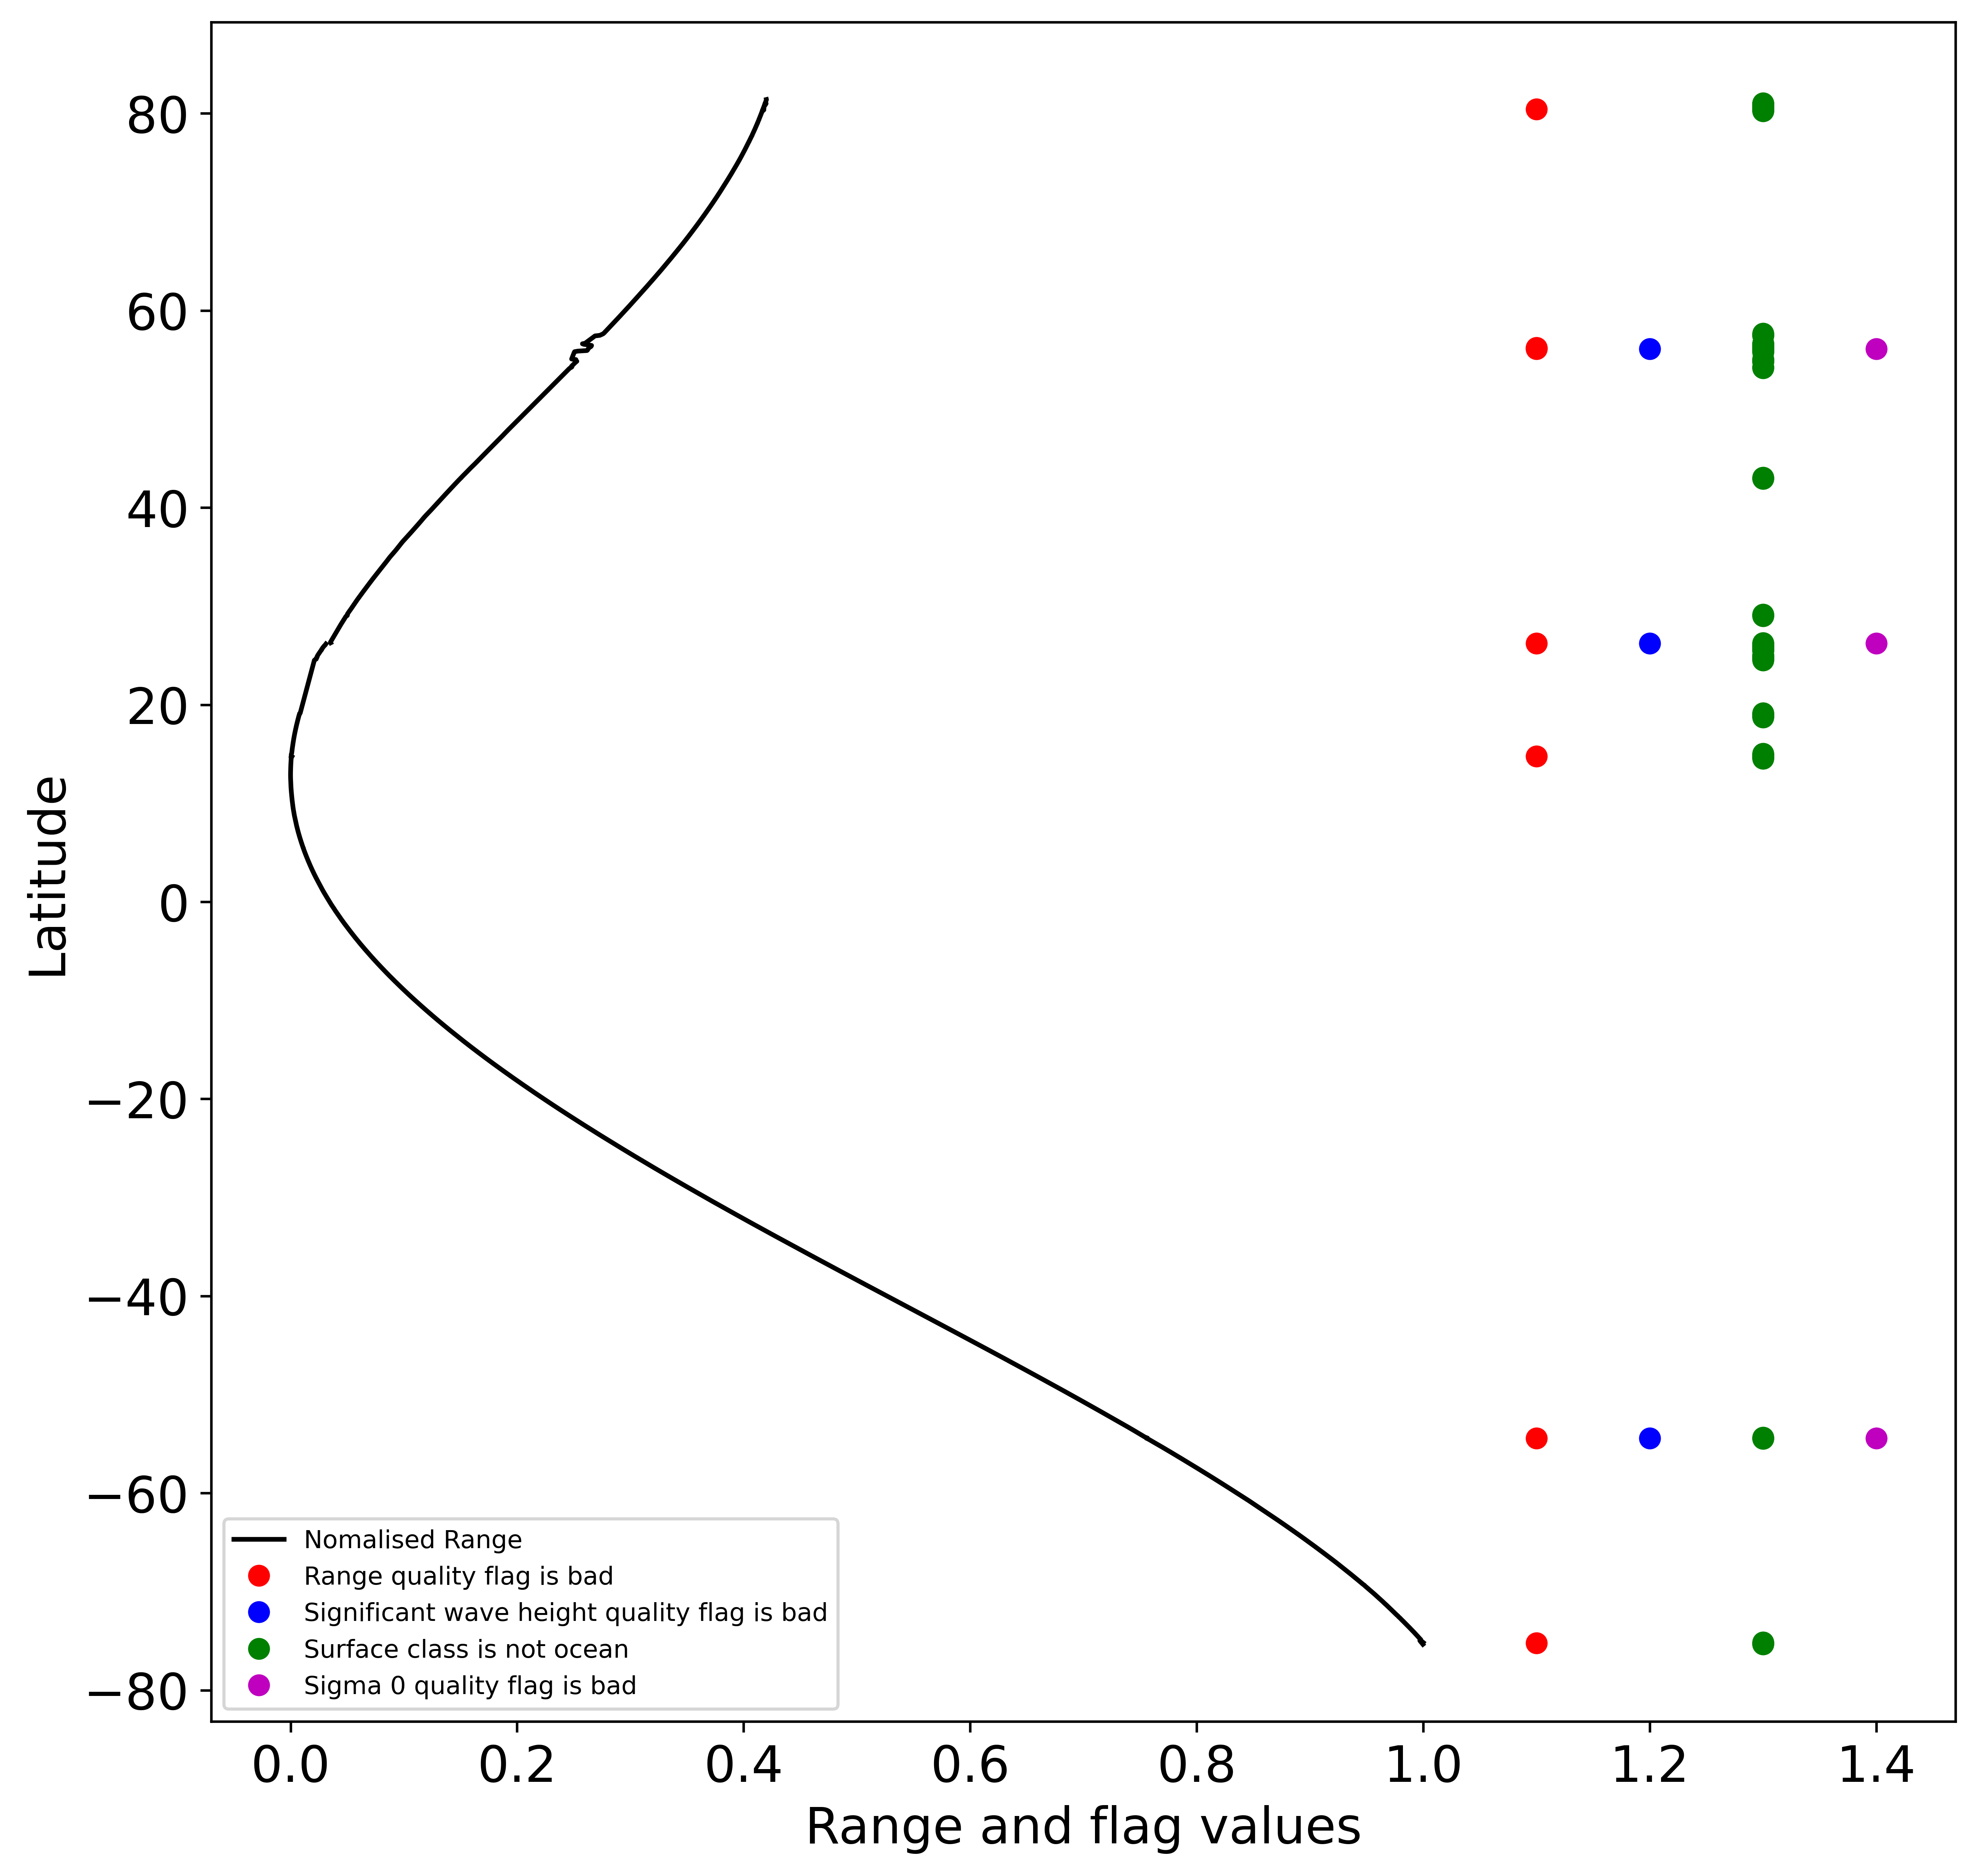

In [19]:
norm_range = range_ku - np.nanmin(range_ku)
norm_range = norm_range / np.nanmax(abs(norm_range))

flags_range1 = range_ocean_qual_01_ku.astype(float)
flags_range1[flags_range1 != 0.0] = 1.1
flags_range1[flags_range1 == 0.0] = np.nan

flags_range2 = swh_ocean_qual_01_ku.astype(float)
flags_range2[flags_range2 != 0.0] = 1.2
flags_range2[flags_range2 == 0.0] = np.nan

flags_range3 = surf_class_01.astype(float)
flags_range3[flags_range3 != 0.0] = 1.3
flags_range3[flags_range3 == 0.0] = np.nan

flags_range4 = sig0_ocean_qual_01_ku.astype(float)
flags_range4[flags_range4 != 0.0] = 1.4
flags_range4[flags_range4 == 0.0] = np.nan

fig1 = plt.figure(figsize=(10, 10), dpi=600)
ax = plt.subplot(1,1,1)
p1, = ax.plot(norm_range, lat, 'k', label='Nomalised Range')
p2, = ax.plot(flags_range1, lat, 'ro',linewidth=0.0, label='Range quality flag is bad')
p3, = ax.plot(flags_range2, lat, 'bo',linewidth=0.0, label='Significant wave height quality flag is bad')
p4, = ax.plot(flags_range3, lat, 'go',linewidth=0.0, label='Surface class is not ocean')
p5, = ax.plot(flags_range4, lat, 'mo',linewidth=0.0, label='Sigma 0 quality flag is bad')
plt.xlabel('Range and flag values', fontsize=16)
plt.ylabel('Latitude', fontsize=16)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, fontsize=8)
plt.savefig('Quality_flags')
plt.show()

Now we will plot some  variables on a map. This will clearly show the data to be a'line' or 'track' of measurements along the orbit, and also that a file contains data from one half orbit.

C:\Users\Evers\Anaconda3\envs\eumetlab\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


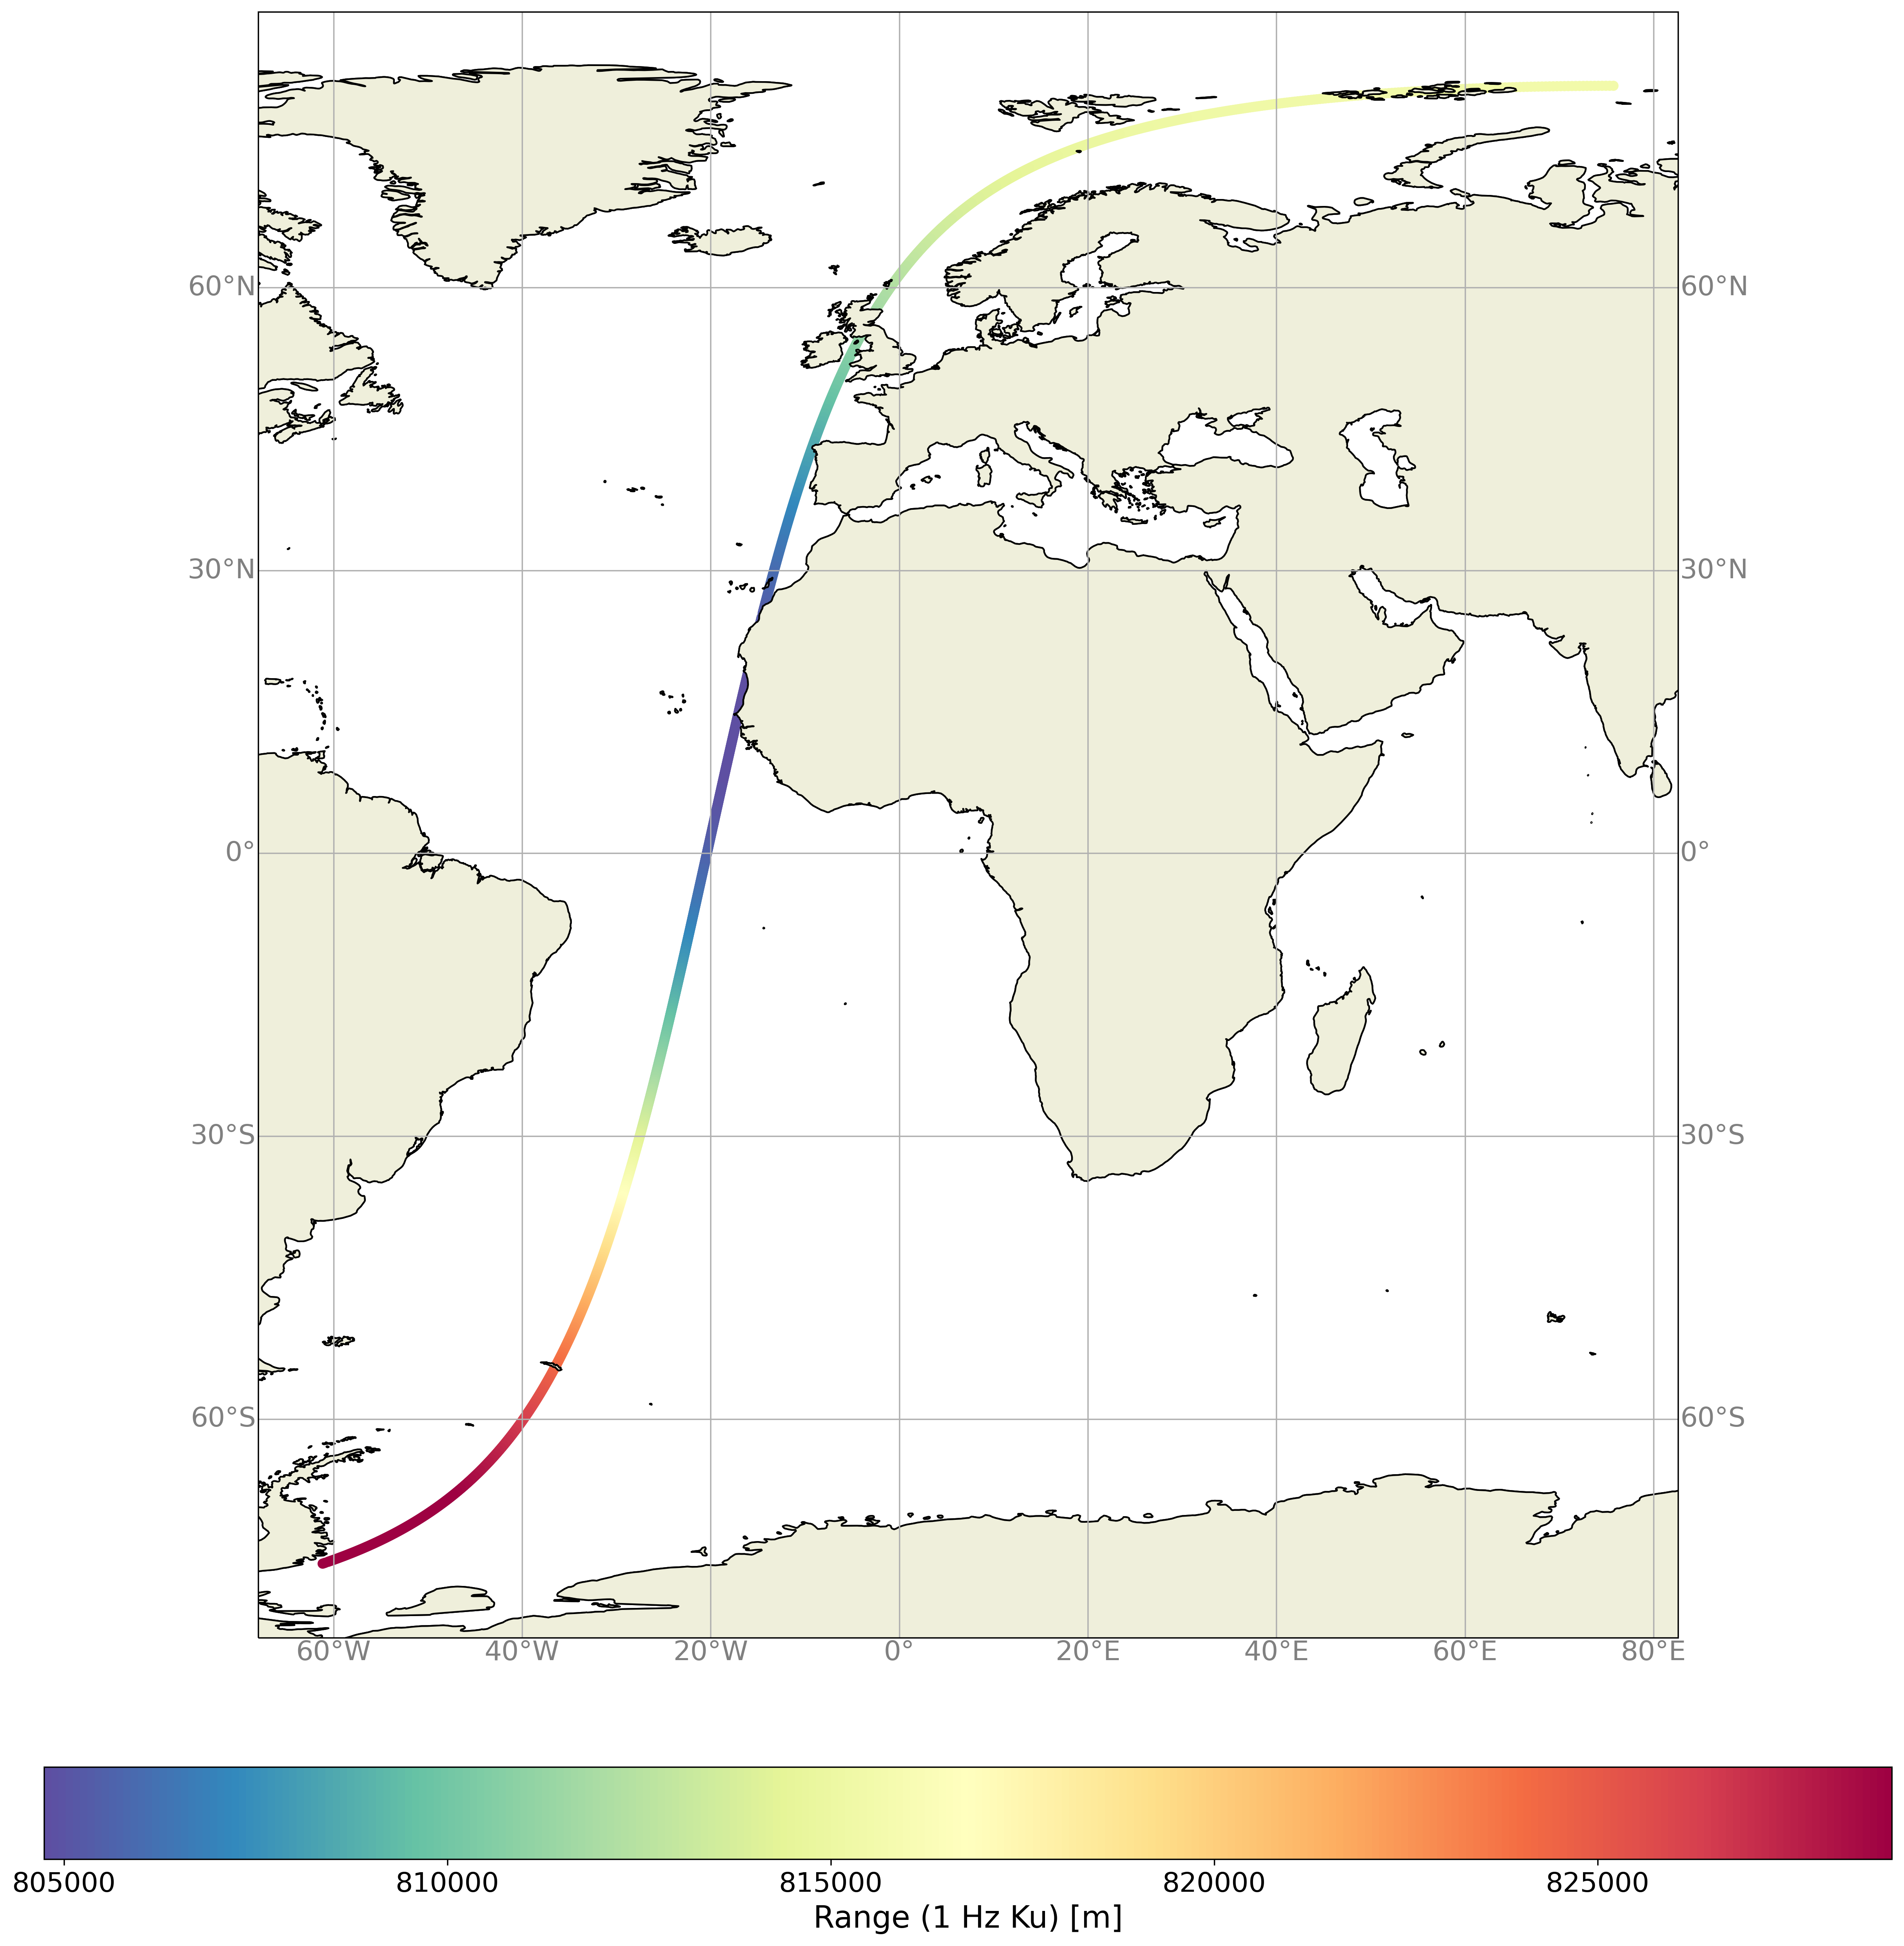

In [20]:
fig1 = plt.figure(figsize=(20, 20), dpi=300)

#define a projection for our map
m = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
#vmin and vmax for the scale are truncated slightly to help viewing; the satellite is at a distance around 315 km from the surface
low_pc = np.percentile(range_ku[np.isfinite(range_ku)],5)
high_pc = np.percentile(range_ku[np.isfinite(range_ku)],95)
range_ku[range_ku < low_pc] = low_pc
range_ku[range_ku > high_pc] = high_pc

f1 = m.scatter(lon, lat, c=range_ku, cmap='Spectral_r', marker='o', edgecolors=None, linewidth=0.0, vmin=low_pc, vmax=high_pc)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}

cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Range (1 Hz Ku) [m]', size=18)
plt.savefig('fig_range')
plt.show()

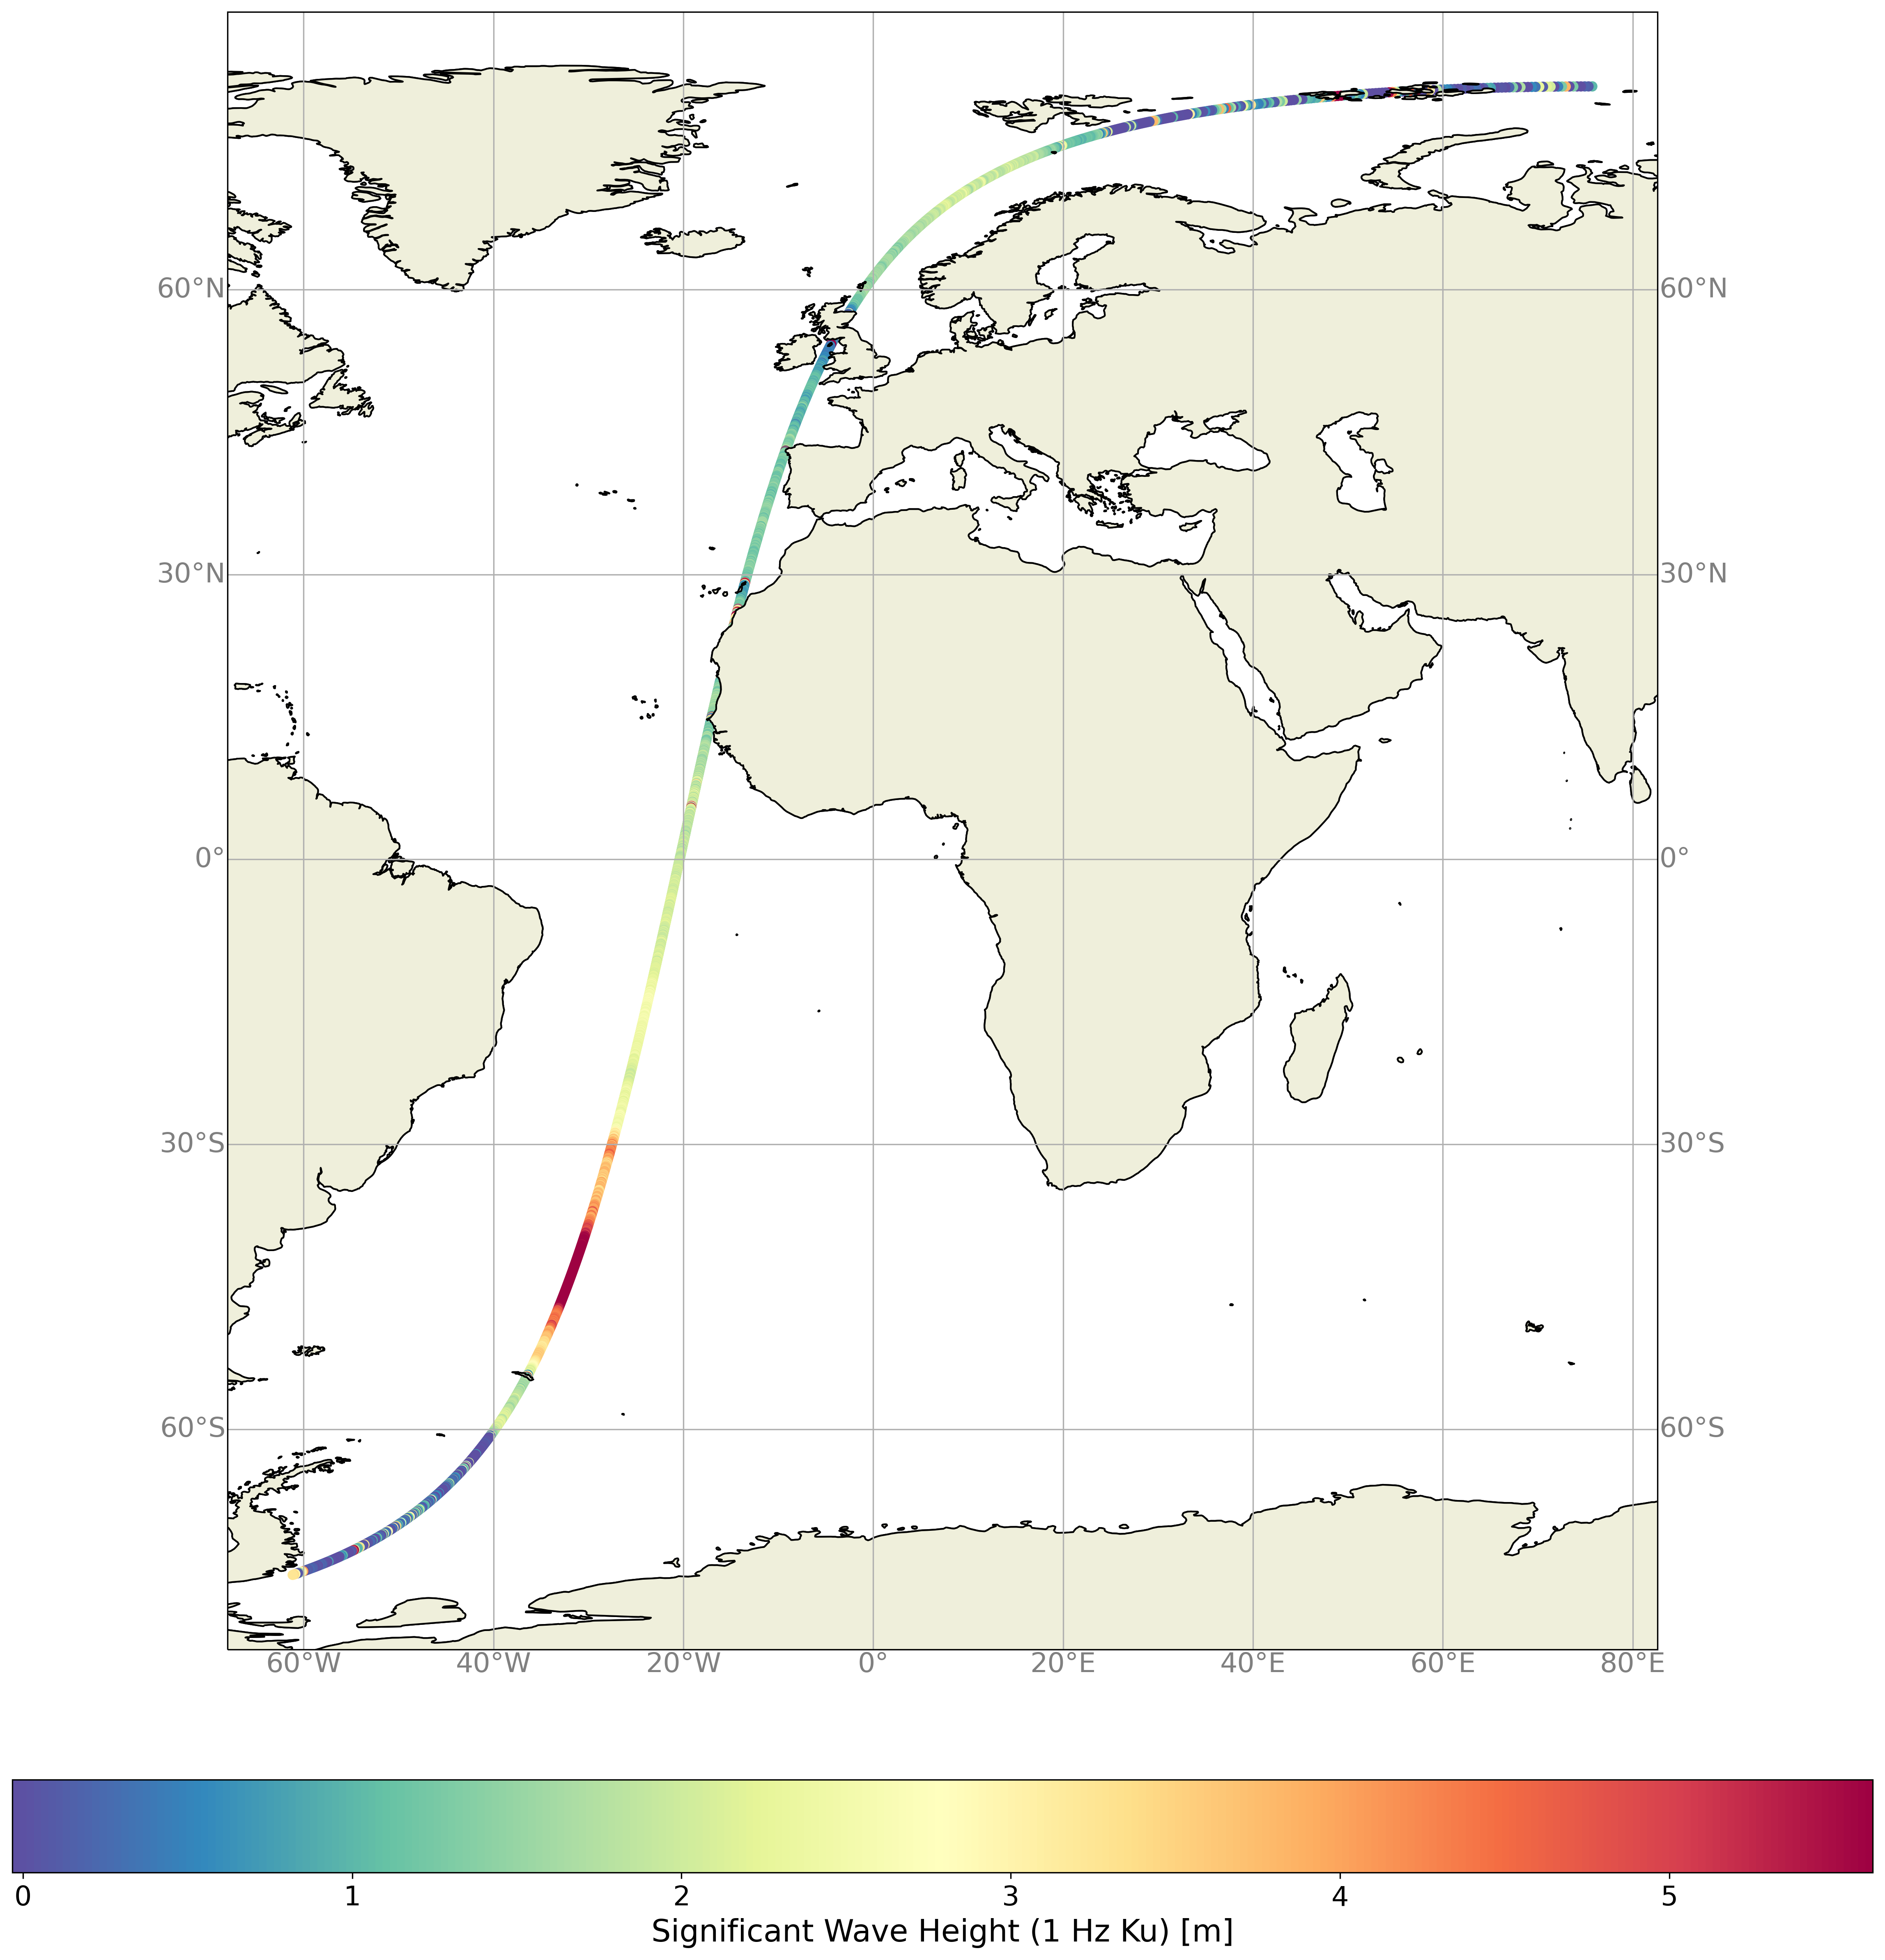

In [14]:
fig1 = plt.figure(figsize=(20, 20), dpi=300)

#define a projection for our map
m = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
#vmin and vmax for the scale are truncated slightly to help viewing; the satellite is at a distance around 315 km from the surface
low_pc = np.percentile(swh_ocean_01_ku[np.isfinite(swh_ocean_01_ku)],5)
high_pc = np.percentile(swh_ocean_01_ku[np.isfinite(swh_ocean_01_ku)],95)
swh_ocean_01_ku[swh_ocean_01_ku < low_pc] = low_pc
swh_ocean_01_ku[swh_ocean_01_ku > high_pc] = high_pc

f1 = m.scatter(lon, lat, c=swh_ocean_01_ku, cmap='Spectral_r', marker='o', edgecolors=None, linewidth=0.0, vmin=low_pc, vmax=high_pc)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}

cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Significant Wave Height (1 Hz Ku) [m]', size=18)
plt.savefig('fig_SWH')
plt.show()

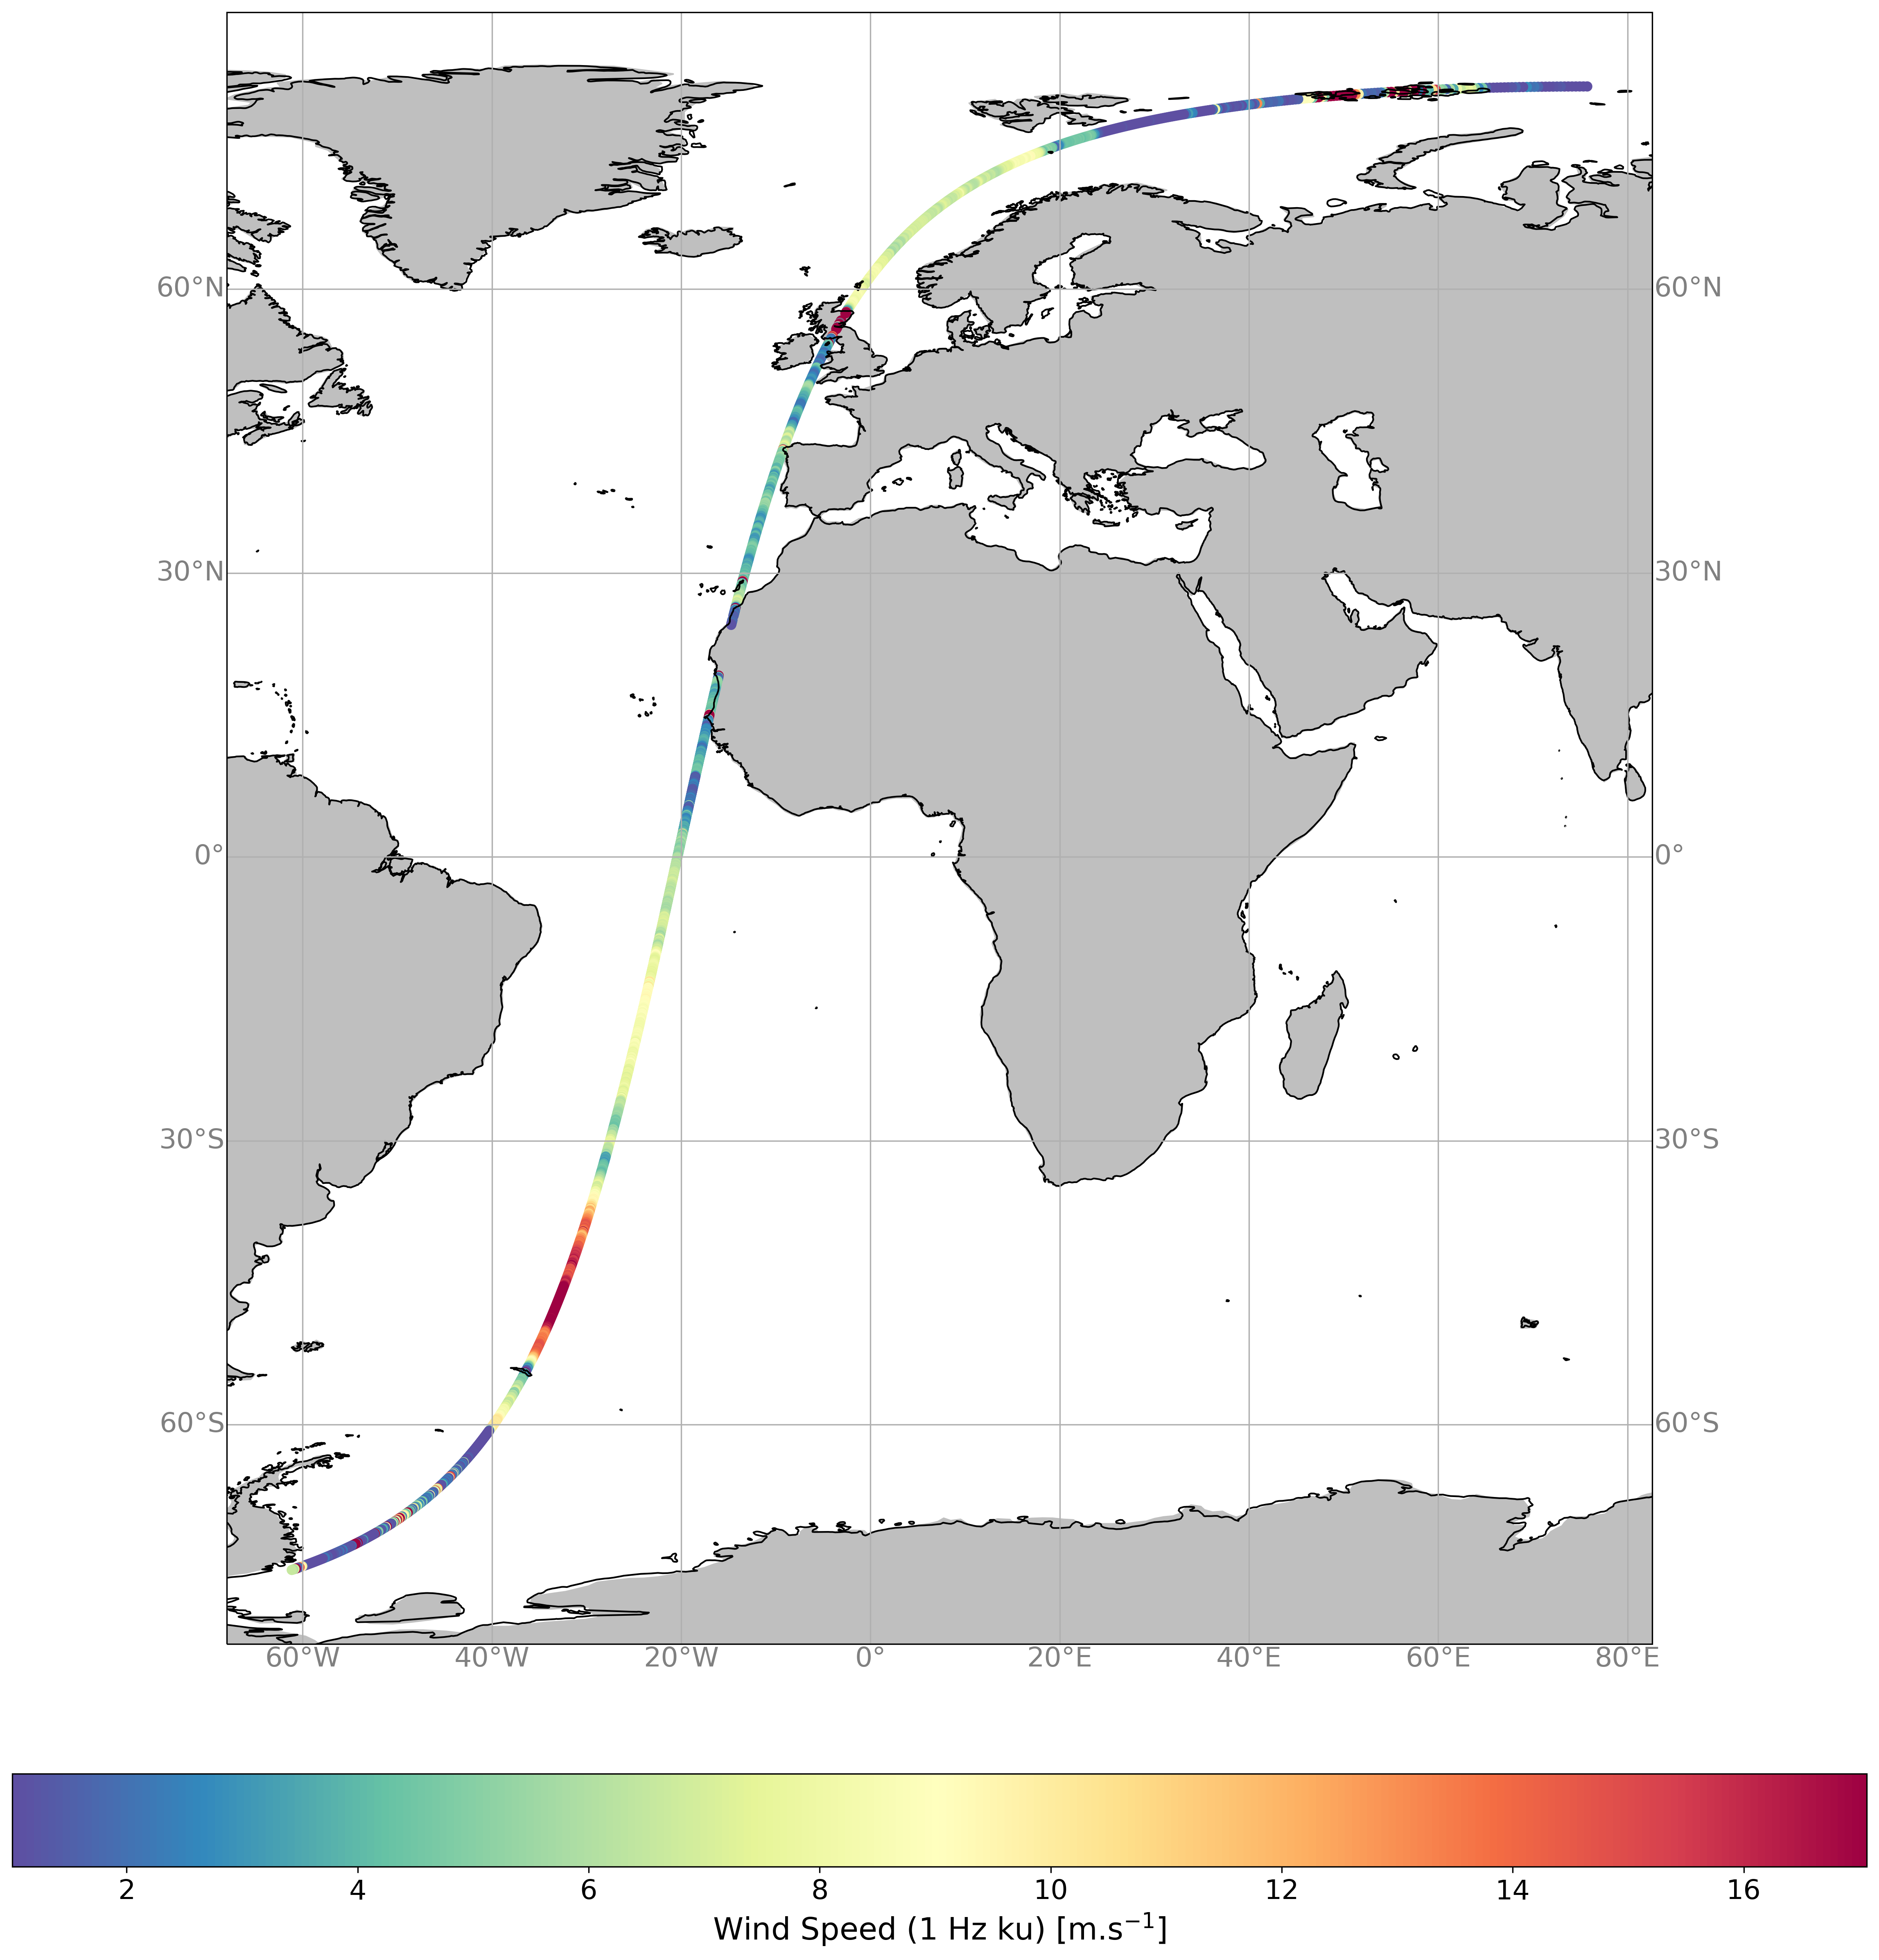

In [15]:
fig1 = plt.figure(figsize=(20, 20), dpi=300)

#define a projection for our map
m = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
#vmin and vmax for the scale are truncated slightly to help viewing; the satellite is at a distance around 315 km from the surface
low_pc = np.percentile(wind_speed_alt_01_ku[np.isfinite(wind_speed_alt_01_ku)],5)
high_pc = np.percentile(wind_speed_alt_01_ku[np.isfinite(wind_speed_alt_01_ku)],95)
wind_speed_alt_01_ku[wind_speed_alt_01_ku < low_pc] = low_pc
wind_speed_alt_01_ku[wind_speed_alt_01_ku > high_pc] = high_pc

f1 = m.scatter(lon, lat, c=wind_speed_alt_01_ku, cmap='Spectral_r', marker='o', edgecolors=None, linewidth=0.0, vmin=low_pc, vmax=high_pc)
m.coastlines(resolution='50m', color='black', linewidth=1)
m.add_feature(cfeature.LAND, facecolor='0.75')
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}

cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Wind Speed (1 Hz ku) [m.s$^{-1}$]', size=18)
plt.savefig('fig_WS')
plt.show()

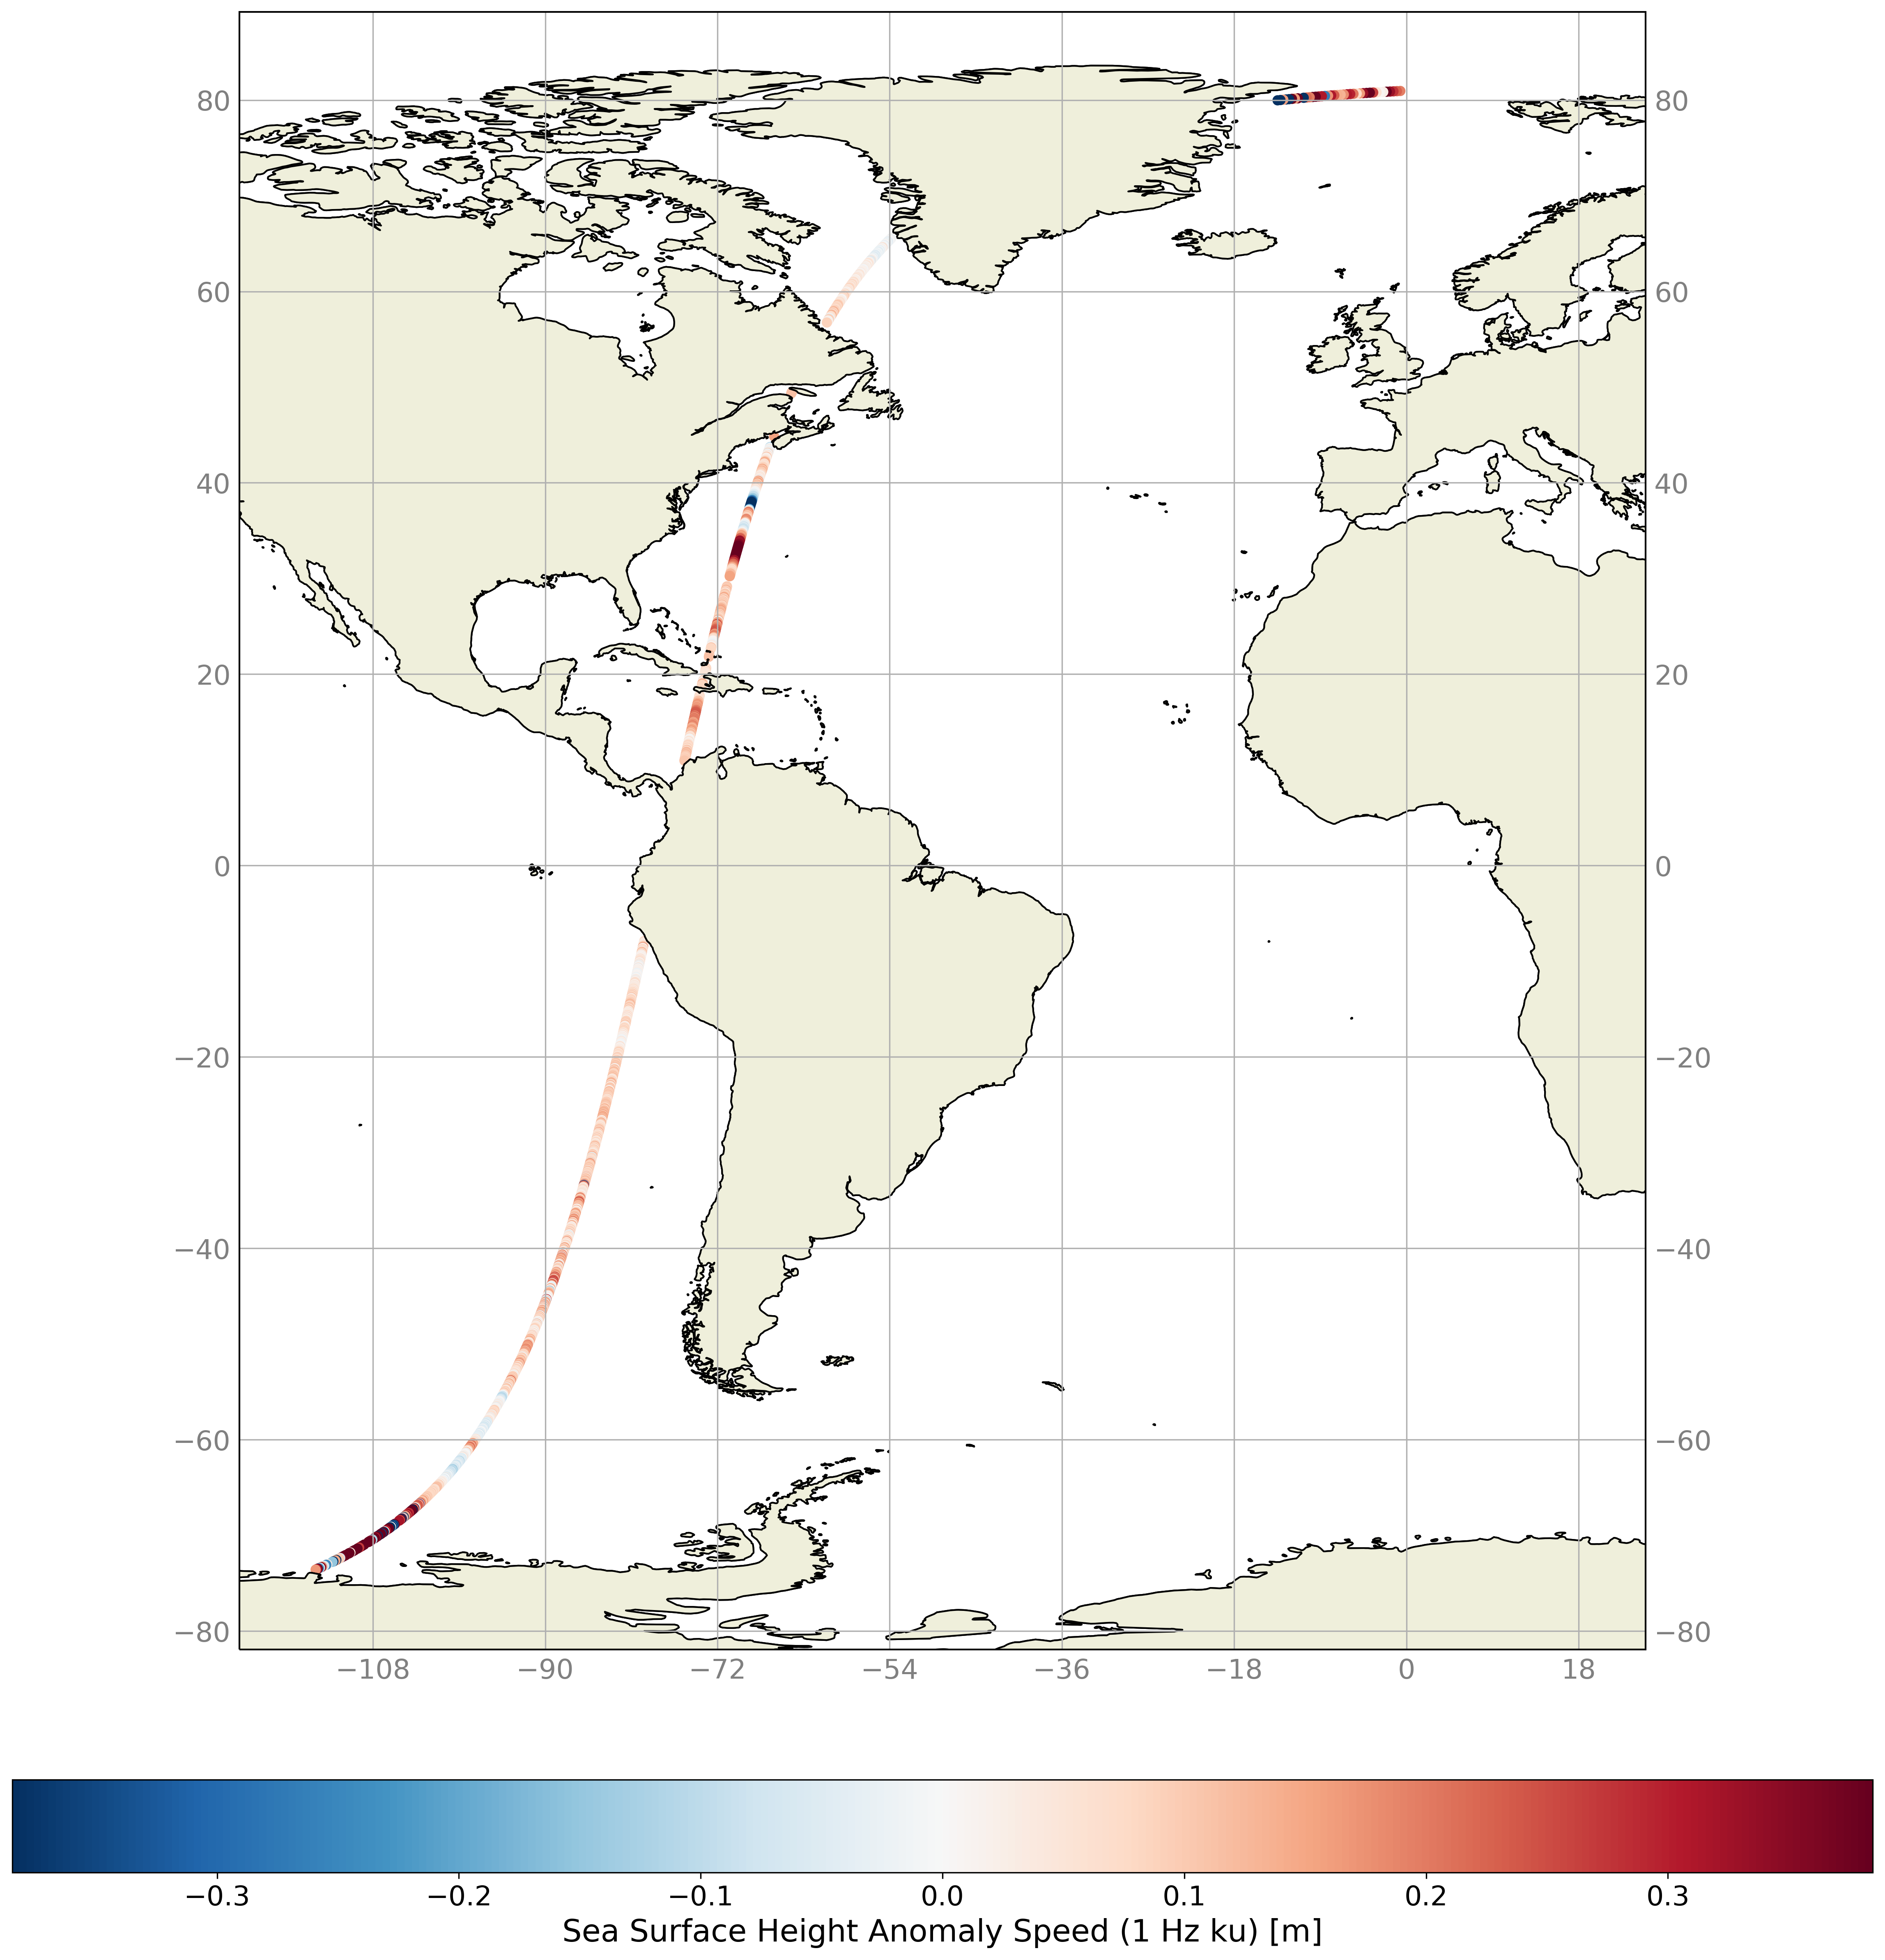

In [12]:
fig1 = plt.figure(figsize=(20, 20), dpi=300)

#define a projection for our map
m = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
#vmin and vmax for the scale are truncated slightly to help viewing; the satellite is at a distance around 315 km from the surface
abs_ssha_01_ku = abs(ssha_01_ku)
high_pc = np.percentile(abs_ssha_01_ku[np.isfinite(ssha_01_ku)],95)
ssha_01_ku[ssha_01_ku < high_pc*-1] = high_pc*-1
ssha_01_ku[ssha_01_ku > high_pc] = high_pc

f1 = m.scatter(lon, lat, c=ssha_01_ku, cmap='RdBu_r', marker='o', edgecolors=None, linewidth=0.0, vmin=-1*high_pc, vmax=high_pc)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}

cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Sea Surface Height Anomaly Speed (1 Hz ku) [m]', size=18)
plt.savefig('fig_SSHA')
plt.show()

Thats the end of this exercise, next we will look at some waveforms (SRAL_Waveforms)

<br> <a href="./SRAL_data_access.ipynb">2 - SRAL data access >></a><span style="float:right;"><a href="./4_SRAL_SLAs.ipynb">4 - SRAL Sea-level anomalies >></a> 
    
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>